# 화재발생여부를 예측하는 것이 목적
- binary classification

## 데이터 설명
- id    아이디(분석에 미사용)
- dt_of_fr    화재발생일시
- fr_yn    화재발생여부
- bldng_us    건물용도
- bldng_archtctr    건물구조
- bldng_cnt    건물채수
- bldng_ar    건물건축면적
- ttl_ar    건물연면적(건물층별합계전체 면적)
- lnd_ar    토지면적
- dt_of_arthrztn    건물승인일자
- ttl_grnd_flr    건물들의 지상 층수의 합
- ttl_dwn_fr    건물들의 지하 층수의 합
- bldng_us_clssfctn    건물용도분류명
- tmprtr    온도(c)
- prcpttn    강수량
- wnd_spd    풍속
- wnd_drctn    풍향
- hmdt    습도
- ele_engry_us_201401    전기 에너지 사용량(2014월1월)
- ele_engry_us_201812    전기 에너지 사용량(2018월12월)
- gas_engry_us_201401    가스 에너지 사용량(2014월1월)
- gas_engry_us_201812    가스 에너지 사용량(2018월12월)
- lw_13101010    복도/계단/출입구의 성능 유지여부(0~5)
- lw_13101110    옥상광장의 피난성능 유지여부(0~5)
- lw_13101210    방화문/방화셔터 등의 성능 유지여부(0~5)
- lw_13101211    방화구획 적합 여부(0~5)
- lw_13101310    경계벽 및 칸막이벽의 변경 등 방화성능 유지여부(0~5)
- lw_13101410    배연설비의 성능 유지여부(0~5)
- lw_13111010    내화구조의 성능 유지여부(0~5)
- lw_13111110    방화벽의 성능 유지여부(0~5)
- lw_13121010    외벽의 성능 유지여부(0~5)
- lw_13121011    창호의 성능 유지여부(0~5)
- lw_13131010    내부마감의 방화성능 유지여부(0~5)
- lw_13131110    외부마감의 노후화 및 마감재 탈락 여부(0~5)
- lw_13141010    지하층의 소방설비 성능 유지여부(0~5)
- lw_13141011    지하층 피난구/피난계단의 성능 유지여부(0~5)
- jmk    지적상 지목
- rgnl_ar_nm    용도지역지구명
- rgnl_ar_nm2    용도지역지구명2
- lnd_us_sttn_nm    토지이용상황명
- rd_sd_nm    도로측면명
- emd_nm    행정구역명
- hm_cnt    행정구역 인구
- fr_sttn_dstnc    119 안전센터와의 거리
- bldng_ar_prc    단위 면적당 건물 가격(2019년)
- fr_wthr_fclt_dstnc    소방용수시설(소화전 등)과의 최소 거리
- fr_mn_cnt    관할 소방서 인원
- mlt_us_yn    다중이용시설 포함여부
- cctv_dstnc    공공 CCTV와의 최소 거리
- cctv_in_100m    반경 100m 이내 공공 CCTV
- fr_wthr_fclt_in_100m    반경 100m 이내 소방용수 시설 수
- tbc_rtl_str_dstnc    담배 소매점과의 최소 거리
- sft_emrgnc_bll_dstnc    안전 비상벨과의 최소 거리
- ahsm_dstnc    자동 심장 충격기와의 최소 거리
- no_tbc_zn_dstnc    금연구역과의 최소 거리
- trgt_crtr    소방관리대상물기준
- fr_fghtng_fclt_spcl_css_5_yn    소방시설특례5호여부
- fr_fghtng_fclt_spcl_css_6_yn    소방시설특례6호여부
- us_yn    사용여부
- dngrs_thng_yn    위험물대상여부
- slf_fr_brgd_yn    자체소방대여부
- blk_dngrs_thng_mnfctr_yn    대량위험물제조소등여부
- cltrl_hrtg_yn    문화재여부

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime as dt

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [30]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rc('font', size=12)

In [2]:
DATA_DIR = './data'
TRAIN_DATA = 'train.csv'
TEST_DATA = 'test.csv'

TRAIN_PATH = os.path.join(DATA_DIR, TRAIN_DATA)
TEST_PATH = os.path.join(DATA_DIR, TEST_DATA)

In [3]:
df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)
df = pd.concat([df_train, df_test])

df = df.reset_index(drop=True)

# Train Data 와 Test Data 의 개수
number_of_train_data = df_train.shape[0]
number_of_test_data = df_test.shape[0]

df.rename(columns={"id":"아이디",
  "dt_of_fr": "화재발생일시",
  "bldng_us":"건물용도",
  "bldng_archtctr":"건물구조",
  "bldng_cnt":"건물채수",
  "bldng_ar":"건물건축면적",
  "ttl_ar":"건물층별합계전체면적",
  "lnd_ar":"토지면적" ,
  "dt_of_athrztn":"건물승인일자" ,
  "ttl_grnd_flr":"건물들지상층수합" ,
  "ttl_dwn_flr":"건물들지하층수합",
  "bldng_us_clssfctn":"건물용도분류명",
  "tmprtr":"온도",
  "wnd_spd":"풍속" ,
   "wnd_drctn":"풍향",
  "hmdt":"습도",
  "jmk":"지적상지목",
   "rgnl_ar_nm":"용도지역지구명",
  "rgnl_ar_nm2":"용도지역지구명2",
  "lnd_us_sttn_nm":"토지이용상황명",
   "rd_sd_nm":"도로측면명",
   "emd_nm":"행정구역명",
   "hm_cnt":"행정구역인구",
   "fr_sttn_dstnc":"소방서거리",
   "bldng_ar_prc":"건물면적당가격",
   "fr_wthr_fclt_dstnc":"소방용수시설거리",
   "fr_mn_cnt":"관할소방서인원",
   "mlt_us_yn":"다중이용시설여부",
   "cctv_dstnc":"공공CCTV거리",
   "cctv_in_100m":"백미터이내CCTV수",
   "fr_wthr_fclt_in_100m":"백미터이내소방용수시설수",
   "tbc_rtl_str_dstnc":"담배소매점거리",
   "sft_emrgnc_bll_dstnc":"안전비상벨최소거리",
   "ahsm_dstnc":"자동심장충격기거리",
   "no_tbc_zn_dstnc":"금연구역최소거리",
   "bldng_cnt_in_50m":"반경50m건물수",
   "fr_yn":"화재발생",
   "trgt_crtr":"소방점검대상물기준",
   "fr_fghtng_fclt_spcl_css_5_yn":"소방시설특례5호여부",
   "fr_fghtng_fclt_spcl_css_6_yn":"소방시설특례6호여부",
   "us_yn":"사용여부",
   "dngrs_thng_yn":"위험물대상여부",
   "slf_fr_brgd_yn":"자체소방대여부",
   "blk_dngrs_thng_mnfctr_yn":"대량위험물제조소등여부",
   "cltrl_hrtg_yn":"문화재여부"}, inplace=True)

y_train = df_train["fr_yn"]
y_train_onehot = pd.get_dummies(df_train[["fr_yn"]])

# df = df.drop('화재발생', axis=1)

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# 데이터 전처리
## 화재발생일시 시간 전처리

In [4]:
date_time = [i.split(" ") for i in df["화재발생일시"].tolist()]
# 날짜,시간 만들기
date = []
time = []
for i in date_time:
    date.append(i[0])
    time.append(i[1])

date = [dt.datetime.strptime(char, "%Y-%m-%d") for char in date]
time = [int(char[0:2]) for char in time]

df["날짜"] = date
df["시간"] = time

# 년, 월 만들기
df['월'] =[month.month for month in date]
df['년도'] = [year.year for year in date]

# 계절 만들기
spring = [3,4,5]; summer = [6,7,8]; fall = [9,10]; winter = [10,11,1,2]
season = ['봄' if i in spring else '여름' if i in summer else '가을' if i in fall else '겨울' for i in df['월']]
df['계절'] = season

# 24시간 새벽,오전오후,저녁으로 나누기
seperate_four = []
for season, time in zip(df['계절'], df['시간']):
    if season == '겨울' and time >= 0 and time <= 8:
        seperate_four.append('새벽')
    elif season == '겨울' and time > 8 and time <= 12:
        seperate_four.append('오전')
    elif season == '겨울' and time > 12 and time < 18:
        seperate_four.append('오후')
    elif season == '겨울' and time >= 18 and time <= 23:
        seperate_four.append('저녁')    
    elif season == '봄' and time >= 0 and time <= 7:
        seperate_four.append('새벽')
    elif season == '봄' and time > 7 and time <= 12:
        seperate_four.append('오전')
    elif season == '봄' and time > 12 and time < 19:
        seperate_four.append('오후')
    elif season == '봄' and time >= 19 and time <= 23:
        seperate_four.append('저녁')
    elif season == '여름' and time >= 0 and time <= 6:
        seperate_four.append('새벽')
    elif season == '여름' and time > 6 and time <= 12:
        seperate_four.append('오전')
    elif season == '여름' and time > 12 and time < 20:
        seperate_four.append('오후')
    elif season == '여름' and time >= 20 and time <= 23:
        seperate_four.append('저녁')
    elif season == '가을' and time >= 0 and time <= 7:
        seperate_four.append('새벽')
    elif season == '가을' and time > 7 and time <= 12:
        seperate_four.append('오전')
    elif season == '가을' and time > 12 and time < 19:
        seperate_four.append('오후')
    elif season == '가을' and time >= 19 and time <= 23:
        seperate_four.append('저녁')

df['하루분기'] = seperate_four

## 결측치 확인

In [5]:
total = df[:number_of_train_data].isnull().sum().sort_values(ascending=False)
percent = (df[:number_of_train_data].isnull().sum()/df[:number_of_train_data].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
lw_13121011,58926,0.995388
lw_13121010,58926,0.995388
lw_13111110,58918,0.995253
lw_13101410,58916,0.995220
lw_13101110,58908,0.995084
lw_13141011,58908,0.995084
lw_13101310,58907,0.995067
lw_13141010,58907,0.995067
lw_13131010,58903,0.995000
lw_13131110,58903,0.995000


In [6]:
missing_data[missing_data["Percent"] > 0.9].index

Index(['lw_13121011', 'lw_13121010', 'lw_13111110', 'lw_13101410',
       'lw_13101110', 'lw_13141011', 'lw_13101310', 'lw_13141010',
       'lw_13131010', 'lw_13131110', 'lw_13101210', 'lw_13101211',
       'lw_13111010', 'lw_13101010', 'gas_engry_us_201802',
       'gas_engry_us_201603', 'gas_engry_us_201712', 'gas_engry_us_201602',
       'gas_engry_us_201601', 'gas_engry_us_201801', 'gas_engry_us_201512',
       'gas_engry_us_201511', 'gas_engry_us_201701', 'gas_engry_us_201510',
       'gas_engry_us_201509', 'gas_engry_us_201803', 'gas_engry_us_201508',
       'gas_engry_us_201507', 'gas_engry_us_201711', 'gas_engry_us_201804',
       'gas_engry_us_201604', 'gas_engry_us_201610', 'gas_engry_us_201605',
       'gas_engry_us_201611', 'gas_engry_us_201705', 'gas_engry_us_201703',
       'gas_engry_us_201702', 'gas_engry_us_201706', 'gas_engry_us_201707',
       'gas_engry_us_201612', 'gas_engry_us_201708', 'gas_engry_us_201606',
       'gas_engry_us_201505', 'gas_engry_us_201609', 'g

- lw 와 gas 특성들은 결측치의 비율이 90퍼센트가 넘어간다 -> column을 제거
- 강수량도 제거

In [7]:
df = df.drop(missing_data[missing_data["Percent"] > 0.9].index, axis=1)

In [8]:
total = df[:number_of_train_data].isnull().sum().sort_values(ascending=False)
percent = (df[:number_of_train_data].isnull().sum()/df[:number_of_train_data].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
ele_engry_us_201612,43550,0.735654
ele_engry_us_201707,43550,0.735654
ele_engry_us_201705,43550,0.735654
ele_engry_us_201704,43550,0.735654
ele_engry_us_201703,43550,0.735654
ele_engry_us_201702,43550,0.735654
ele_engry_us_201701,43550,0.735654
ele_engry_us_201611,43550,0.735654
ele_engry_us_201610,43550,0.735654
ele_engry_us_201609,43550,0.735654


In [9]:
df["ele_engry_us_201609"].unique()

array([nan,  0.])

- ele 특성의 경우 NaN 값 아니면 0 -> 이 특성이 의미가 있을까? -> 제거

In [10]:
missing_data.head(60)

,Total,Percent
ele_engry_us_201612,43550,0.735654
ele_engry_us_201707,43550,0.735654
ele_engry_us_201705,43550,0.735654
ele_engry_us_201704,43550,0.735654
ele_engry_us_201703,43550,0.735654
ele_engry_us_201702,43550,0.735654
ele_engry_us_201701,43550,0.735654
ele_engry_us_201611,43550,0.735654
ele_engry_us_201610,43550,0.735654
ele_engry_us_201609,43550,0.735654


In [11]:
df = df.drop(missing_data.head(60).index[:], axis=1)
df_train = df_train.drop(missing_data.head(60).index[:], axis=1)

In [12]:
total = df[:number_of_train_data].isnull().sum().sort_values(ascending=False)
percent = (df[:number_of_train_data].isnull().sum()/df[:number_of_train_data].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
건물용도분류명,29343,0.495667
건물용도,27677,0.467525
건물구조,27665,0.467322
건물승인일자,27581,0.465903
건물면적당가격,21895,0.369854
건물들지하층수합,11005,0.185898
건물들지상층수합,10210,0.172469
토지이용상황명,1776,0.030001
용도지역지구명2,1491,0.025186
용도지역지구명,1491,0.025186


- 범주형 데이터는 NA 범주 생성해주기

In [13]:
df["건물용도분류명"].unique()

array([nan, '공공용', '주거용', '상업용', '공업용', '문교사회용', '농수산용', '기타'],
      dtype=object)

In [14]:
df["건물용도분류명"] = df["건물용도분류명"].fillna("NA")

In [15]:
df["건물용도"].unique()

array([nan, '업무시설', '단독주택', '위험물저장및처리시설', '공동주택', '제1종근린생활시설', '공장',
       '제2종근린생활시설', '노유자시설', '운동시설', '동.식물 관련시설', '창고시설', '의료시설', '위락시설',
       '자동차관련시설', '종교시설', '근린생활시설', '분뇨.쓰레기처리시설', '숙박시설', '교육연구시설',
       '발전시설', '관광휴게시설', '판매시설', '수련시설', '문화및집회시설', '묘지관련시설', '방송통신시설',
       '장례식장', '운수시설', '교정및군사시설', '교육연구및복지시설', '파출소', '판매및영업시설', '시장',
       '공공용시설'], dtype=object)

In [16]:
df["건물용도"] = df["건물용도"].fillna("NA")

In [17]:
df["건물구조"].unique()

array([nan, '철근콘크리트구조', '블록구조', '벽돌구조', '경량철골구조', '일반목구조', '일반철골구조',
       '기타구조', '강파이프구조', '조적구조', '석구조', '기타조적구조', '통나무구조', '철골콘크리트구조',
       '철골철근콘크리트구조', '기타강구조', '프리케스트콘크리트구조', '목구조', '기타콘크리트구조'],
      dtype=object)

In [48]:
# 목구조, 콘크리트구조, 벽돌구조, 철골구조, 조적구조 묶어주기
df['건물구조'] = ['목구조' if x in ['일반목구조','통나무구조','목구조'] else '콘크리트구조' if x in ['철근콘크리트구조','철골콘크리트구조','철골철근콘크리트구조',\
     '프리케스트콘크리트구조','기타콘크리트구조'] else '벽돌구조' if x in ['블록구조','벽돌구조'] else '철골구조' if x in ['경량철골구조', '일반철골구조'] 
     else '조적구조' if x in ['조적구조', '기타조적구조'] else x for x in df['건물구조']]

In [49]:
df['건물구조'].unique()

array(['NA', '콘크리트구조', '벽돌구조', '철골구조', '목구조', '기타구조', '강파이프구조', '조적구조',
       '석구조', '기타강구조'], dtype=object)

In [20]:
df["건물구조"] = df["건물구조"].fillna("NA")

In [21]:
# 년도만 남기기
df["건물승인일자"] = df["건물승인일자"].astype(str).map(lambda x: x[0:4])

In [22]:
df['건물승인일자'].unique()

array(['nan', '1988', '1965', '2002', '2000', '1983', '1972', '2006',
       '2010', '1996', '2009', '1940', '1995', '1979', '2004', '2011',
       '1970', '1955', '1975', '1935', '1946', '1997', '1999', '2007',
       '2008', '2012', '1993', '1978', '2005', '2003', '1945', '2015',
       '1981', '2013', '2016', '1971', '1926', '1930', '1910', '1998',
       '1992', '1973', '1952', '1976', '1994', '2001', '1990', '1915',
       '1927', '1950', '1984', '1960', '1904', '1919', '1922', '1991',
       '1934', '1967', '1987', '1963', '1941', '1925', '1982', '1949',
       '1880', '1929', '1958', '1986', '1957', '1974', '1924', '2018',
       '1977', '1969', '2014', '1968', '1985', '1943', '1931', '1948',
       '1951', '1923', '1894', '1912', '1800', '1956', '1920', '1932',
       '1918', '1980', '1944', '1911', '1933', '1871', '1937', '1882',
       '1962', '1903', '1966', '2017', '1954', '1900', '1989', '1942',
       '1939', '1936', '1905', '1916', '1896', '1893', '1890', '1901',
       

In [23]:
df["건물승인일자"] = df["건물승인일자"].fillna("NA")

In [24]:
df['건물면적당가격']

0         478038.0
1              NaN
2         671829.0
3              NaN
4         522466.0
           ...    
62151    1409566.0
62152          NaN
62153          NaN
62154          NaN
62155          NaN
Name: 건물면적당가격, Length: 62156, dtype: float64

<AxesSubplot:xlabel='건물면적당가격', ylabel='화재발생'>

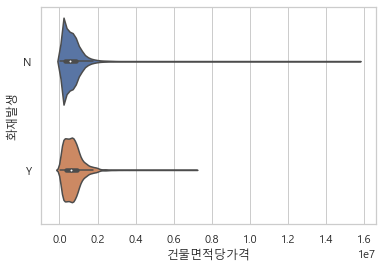

In [31]:
sns.violinplot(x='건물면적당가격', y="화재발생", data=df)

In [33]:
df['건물들지하층수합'].unique()

array([ 0., nan,  6.,  1.,  3.,  9.,  4.,  5.,  2., 15., 10., 30.,  7.,
       18., 11., 14., 13., 17.,  8., 23., 33., 21., 16., 12., 42., 60.,
       48., 46., 31., 36., 20.])

<AxesSubplot:xlabel='건물들지하층수합', ylabel='화재발생'>

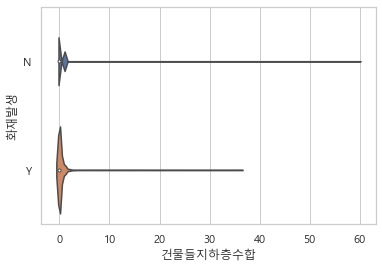

In [34]:
sns.violinplot(x='건물들지하층수합', y="화재발생", data=df)

In [35]:
df['건물들지상층수합'].unique()

array([  1.,   5.,   2.,  nan, 200.,  15.,   3.,   4.,   6.,  10.,   7.,
         9., 131.,  95.,   8.,  16.,  62.,  91.,  17.,   0.,  33.,  13.,
        18.,  14.,  47.,  54.,  11.,  19.,  27.,  45.,  21.,  20.,  82.,
       184.,  93.,  22.,  80.,  32., 256., 351.,  48., 189., 312., 100.,
        55., 124., 182., 172., 138., 151.,  30., 533., 197., 229., 144.,
       196., 132.,  96.,  63.,  64., 270.,  78., 193.,  89., 395., 216.,
       178.,  68., 164., 139.,  24., 149.,  43.,  65.,  52., 191., 221.,
       224., 186., 163., 413.,  44., 386., 201.,  94., 143.,  69.,  26.,
        66.,  36.,  25.,  23.,  12.,  41.,  86.,  97., 103., 444., 127.,
       241., 171.,  35.,  28.,  29., 129.,  40.,  59., 126.,  39.,  75.,
       285.,  90., 102.,  88.,  60.,  72.,  51., 105.,  71.,  84., 152.,
        77., 253., 180., 118.,  31.,  81., 343.,  76.,  37., 123., 369.,
        46., 165., 183.,  92., 223., 244., 167.,  85., 133., 331., 128.,
        73.,  50., 301., 122., 125., 109.,  34., 19

<AxesSubplot:xlabel='건물들지상층수합', ylabel='화재발생'>

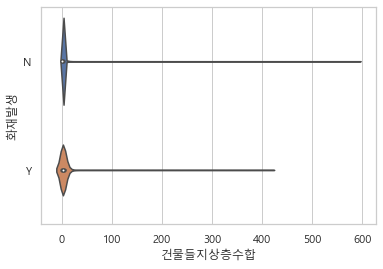

In [36]:
sns.violinplot(x='건물들지상층수합', y="화재발생", data=df)